In [28]:
import warnings
warnings.filterwarnings('ignore')

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
from sklearn.model_selection import train_test_split

import cv2
#from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Input, Dense,Conv2D , MaxPooling2D, Flatten,BatchNormalization,Dropout
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow_hub as hub

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
normal_path = ('/content/drive/MyDrive/Stroke Classification /Model with architecture changes/Dataset (4 Augmentations)/Normal AUG/Images')
stroke_path = ('/content/drive/MyDrive/Stroke Classification /Model with architecture changes/Dataset (4 Augmentations)/Stroke AUG/Images')

In [31]:
normal_folder=os.listdir(normal_path)
stroke_folder=os.listdir(stroke_path)

In [32]:
print("Images in Normal Data:",len(normal_folder))
print("Images in Stroke Data:",len(stroke_folder))

Images in Normal Data: 7765
Images in Stroke Data: 4750


In [33]:
normal_folder = os.listdir(normal_path)
stroke_folder = os.listdir(stroke_path)

data = []

for img_file in normal_folder:
    image = Image.open(os.path.join(normal_path, img_file))
    image = image.resize((100,100))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

for img_file in stroke_folder:
    image = Image.open(os.path.join(stroke_path, img_file))
    image = image.resize((100,100))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

In [34]:
len(data)

12515

In [35]:
data[0].shape

(100, 100, 3)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
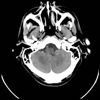

In [36]:
data[0]

In [37]:
normal_label = [0]*len(normal_folder)
stroke_label = [1]*len(stroke_folder)

In [38]:
Target_label = normal_label + stroke_label

In [39]:
len(Target_label)

12515

In [40]:
x = np.array(data)
y = np.array(Target_label)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
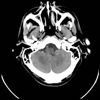

In [41]:
x[0]

In [42]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [43]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,shuffle=True)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(10012, 100, 100, 3)
(2503, 100, 100, 3)
(10012,)
(2503,)


In [44]:
x_train_s = x_train/255
x_test_s = x_test/255

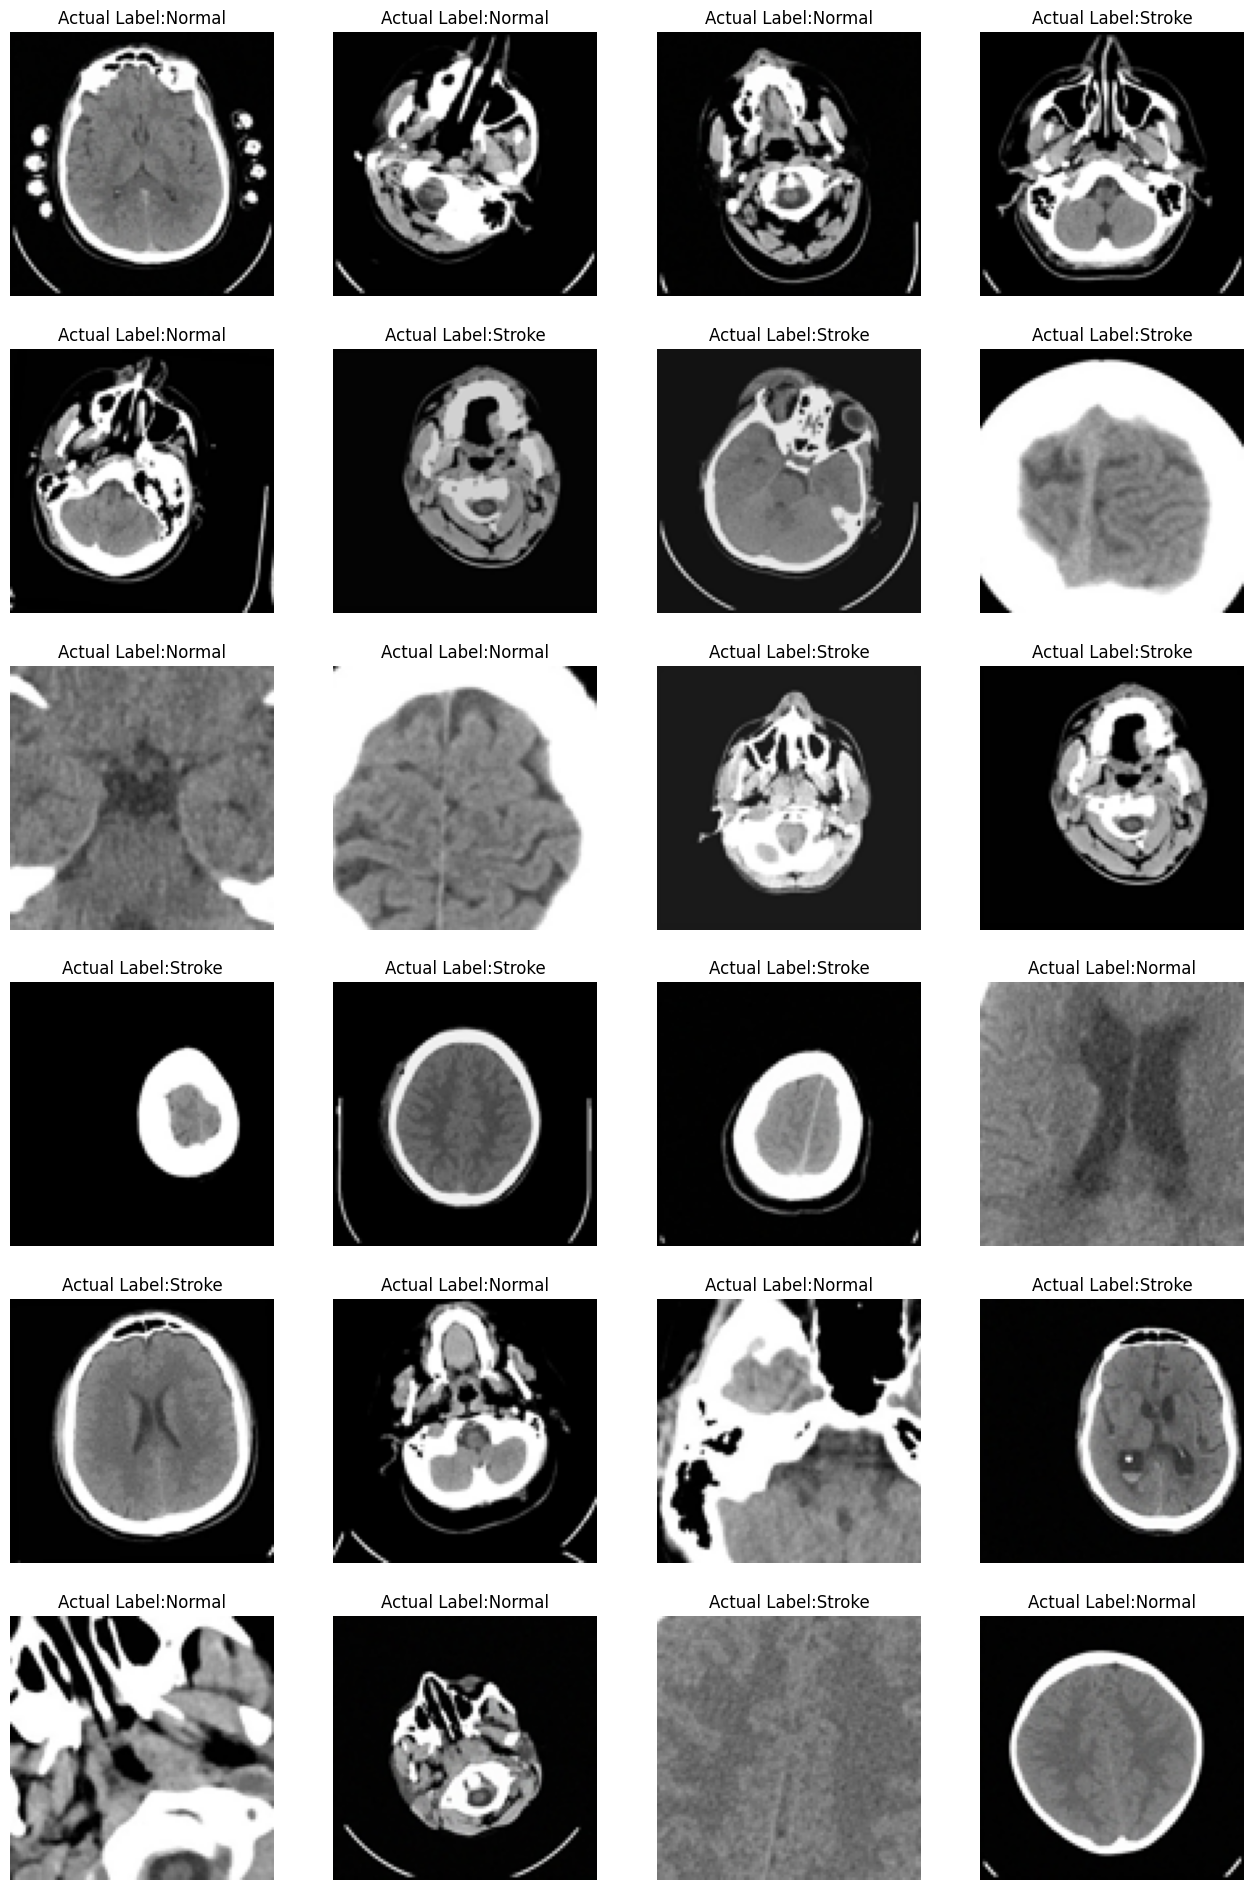

In [45]:
class_labels = ["Normal","Stroke"]
plt.figure(figsize=(16,24))
for i in range(24):
    plt.subplot(6,4,i+1)
    plt.imshow(x_train[i])
    plt.title(f"Actual Label:{class_labels[y_train[i]]}")
    plt.axis("off")

In [46]:
model = Sequential()

model.add(Conv2D(filters=100, kernel_size=(3,3), strides=(1,1), padding="valid", activation="relu", input_shape=(100,100,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=80, kernel_size=(3,3), strides=(1,1), padding="valid", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding="valid", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=48, kernel_size=(3,3), strides=(1,1), padding="valid", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(units=500, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=500, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

model.summary()



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 98, 98, 100)         │           2,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 49, 49, 100)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 47, 47, 80)          │          72,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 23, 23, 80)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 21, 21, 64)          │          46,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 8, 8, 48)            │          27,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 4, 4, 48)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 768)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 500)                 │         384,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 500)                 │         250,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             501 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 784,221 (2.99 MB)

 Trainable params: 784,221 (2.99 MB)

 Non-trainable params: 0 (0.00 B)

In [47]:
history = model.fit(x_train_s,y_train,batch_size=16,
         epochs=10, validation_data=(x_test_s,y_test))

Epoch 1/10
626/626 ━━━━━━━━━━━━━━━━━━━━ 250s 396ms/step - accuracy: 0.6339 - loss: 0.6547 - val_accuracy: 0.7375 - val_loss: 0.5320
Epoch 2/10
626/626 ━━━━━━━━━━━━━━━━━━━━ 266s 403ms/step - accuracy: 0.7561 - loss: 0.4968 - val_accuracy: 0.8318 - val_loss: 0.3499
Epoch 3/10
626/626 ━━━━━━━━━━━━━━━━━━━━ 259s 398ms/step - accuracy: 0.8371 - loss: 0.3219 - val_accuracy: 0.8738 - val_loss: 0.2705
Epoch 4/10
626/626 ━━━━━━━━━━━━━━━━━━━━ 264s 402ms/step - accuracy: 0.8831 - loss: 0.2383 - val_accuracy: 0.8965 - val_loss: 0.2210
Epoch 5/10
626/626 ━━━━━━━━━━━━━━━━━━━━ 264s 404ms/step - accuracy: 0.9022 - loss: 0.2025 - val_accuracy: 0.8909 - val_loss: 0.2377
Epoch 6/10
626/626 ━━━━━━━━━━━━━━━━━━━━ 262s 405ms/step - accuracy: 0.9215 - loss: 0.1634 - val_accuracy: 0.9101 - val_loss: 0.2108
Epoch 7/10
626/626 ━━━━━━━━━━━━━━━━━━━━ 263s 406ms/step - accuracy: 0.9377 - loss: 0.1423 - val_accuracy: 0.9073 - val_loss: 0.2467
Epoch 8/10
626/626 ━━━━━━━━━━━━━━━━━━━━ 254s 406ms/step - accuracy: 0.9338 -

In [48]:
loss, acc = model.evaluate(x_test_s,y_test)
print("Loss on Test Data:",loss)
print("Accuracy on Test Data:",acc)

loss, acc = model.evaluate(x_train_s,y_train)
print("Loss on Train Data:",loss)
print("Accuracy on Train Data:",acc)

79/79 ━━━━━━━━━━━━━━━━━━━━ 20s 252ms/step - accuracy: 0.9256 - loss: 0.1910
Loss on Test Data: 0.2067420482635498
Accuracy on Test Data: 0.9232920408248901
313/313 ━━━━━━━━━━━━━━━━━━━━ 68s 218ms/step - accuracy: 0.9525 - loss: 0.0948
Loss on Train Data: 0.09758567065000534
Accuracy on Train Data: 0.9507591128349304


In [49]:
y_pred_test = model.predict(x_test_s)
y_pred_test_label = [1 if i>=0.5 else 0 for i in y_pred_test]

79/79 ━━━━━━━━━━━━━━━━━━━━ 17s 220ms/step


In [50]:
print("-----Metrics Evaluation On Test Data -----")
print()
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_test_label))
print()
print("Classification Report:\n",classification_report(y_test,y_pred_test_label))

-----Metrics Evaluation On Test Data -----

Confusion Matrix:
 [[1513   54]
 [ 138  798]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      1567
           1       0.94      0.85      0.89       936

    accuracy                           0.92      2503
   macro avg       0.93      0.91      0.92      2503
weighted avg       0.92      0.92      0.92      2503



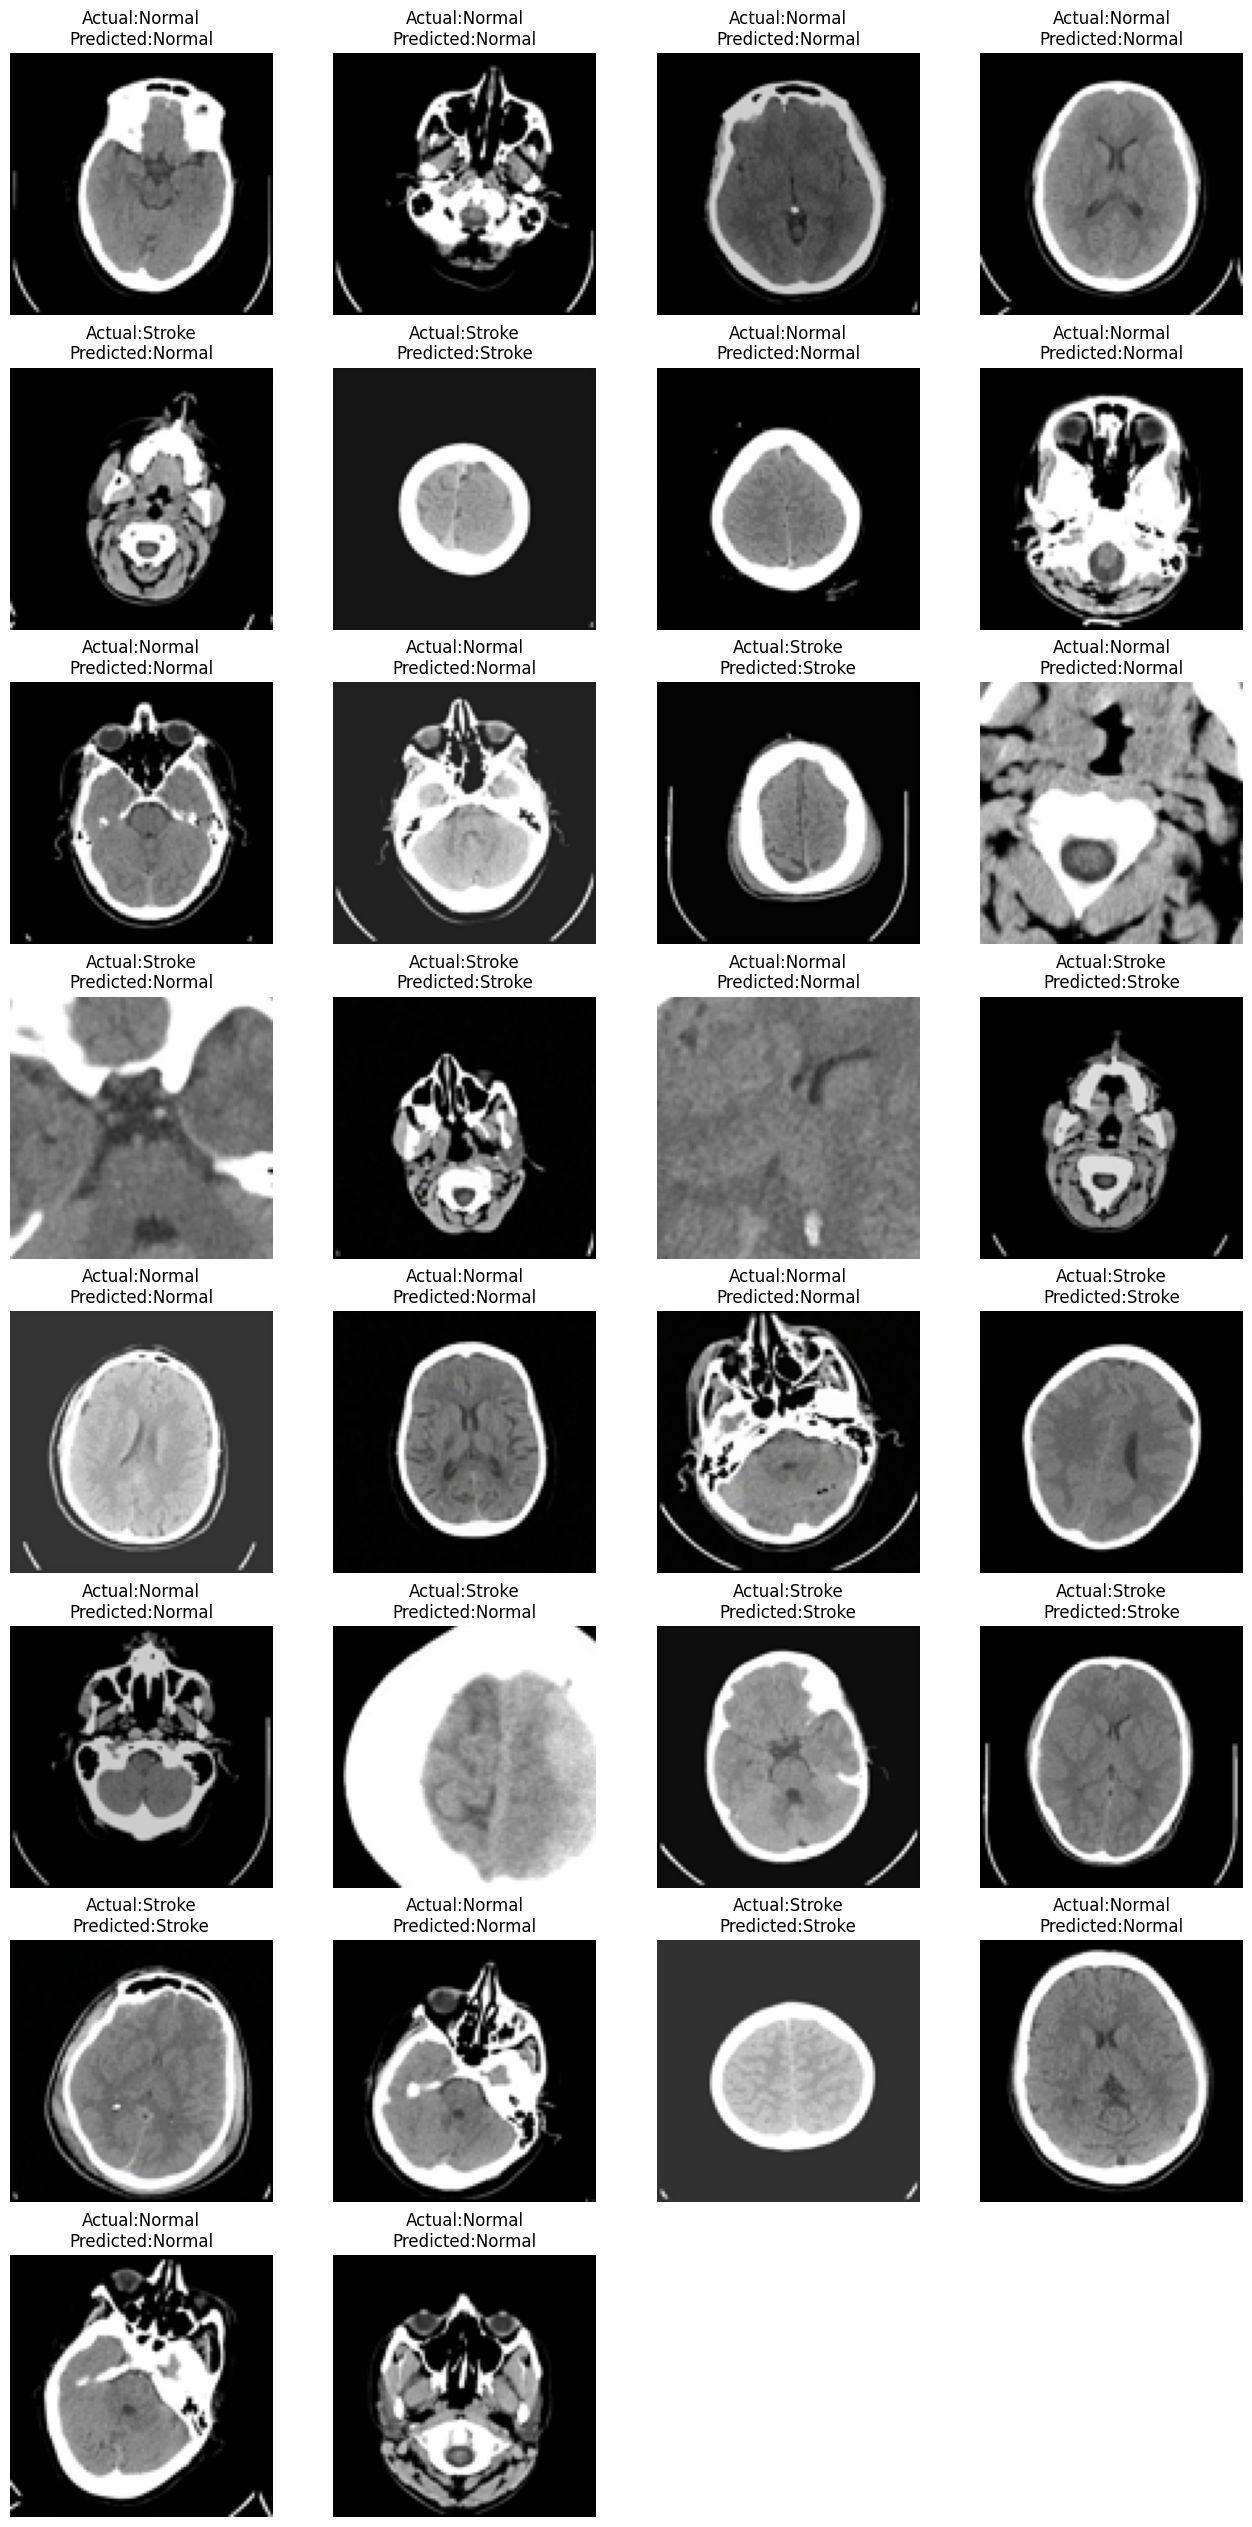

In [51]:
class_labels = ["Normal","Stroke"]
plt.figure(figsize=(16,32))
for i in range(30):
    plt.subplot(8,4,i+1)
    plt.imshow(x_test[i])
    plt.title(f"Actual:{class_labels[y_test[i]]}\nPredicted:{class_labels[y_pred_test_label[i]]}")
    plt.axis("off")

In [53]:
model.save("/content/drive/MyDrive/App/model.h5")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.2 MB/s eta 0:00:00


In [56]:
import streamlit as st
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from PIL import Image

# Load trained model
model = load_model('/content/drive/MyDrive/App/model.h5')

# Function to preprocess image
def preprocess_image(image):
    image = image.resize((100, 100))  # Resize to match model input
    image = np.array(image) / 255.0  # Normalize
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

# Streamlit UI
st.set_page_config(page_title="Brain Stroke Classifier", page_icon="🧠", layout="centered")

st.title("🧠 Brain Stroke Classification")
st.markdown("Upload a brain scan image, and the model will predict whether it shows signs of stroke.")

# Upload Image
uploaded_file = st.file_uploader("Upload Brain Scan (JPG/PNG)", type=["jpg", "png"])

if uploaded_file is not None:
    image = Image.open(uploaded_file)
    st.image(image, caption="Uploaded Image", use_column_width=True)

    # Preprocess and predict
    processed_image = preprocess_image(image)
    prediction = model.predict(processed_image)[0][0]
    label = "Stroke Detected 🛑" if prediction >= 0.5 else "No Stroke ✅"

    # Display Results
    st.markdown(f"### Prediction: **{label}**")
    st.write(f"Confidence Score: {prediction:.2f}")

st.markdown("---")
st.markdown("Developed with ❤️ using Streamlit")


2025-02-27 10:53:35.937 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-27 10:53:35.940 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-27 10:53:36.052 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-02-27 10:53:36.053 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-27 10:53:36.058 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-27 10:53:36.060 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-27 10:53:36.063 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when runn

DeltaGenerator()

In [57]:
!streamlit run app.py & npx localtunnel --port 8501


Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py
⠙⠹⠸⠼⠴Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) ^C


In [61]:
!ls "/content/drive/MyDrive/"


'1(1).html'
'1(2).html'
'1(3).html'
'1(4).html'
'1(5).html'
'1(6).html'
'1(7).html'
 241_AI_INDEX.gdoc
'3170710_MCWC-Unit 1.pptx'
 ADA
 AJP
 App
 brain_stroke_model.h5
 Certificate.docx
 Classroom
 cloudflared
'CN Practical File.docx'
'CN Practical File.gdoc'
 cns_14.pdf
'CNS 6-9.pdf'
 CNS.docx
'CNS INDEX.pdf'
 COA
'Colab Notebooks'
'Comp21_Sem 6_Project List DL&NN 232.gsheet'
'Copy of Media.Encoder.2022 (1).zip'
'Copy of Media.Encoder.2022.zip'
 cryptography-and-network-security-forouzan-copy.pdf
 cryptography-and-network-security_-principles-and-practice-7th-global-edition.pdf
'Data Augmentation.py'
 DE
 DL
 DOC-20230118-WA0002..pdf
'Document from Gowri Nair (1).pdf'
'Document from Gowri Nair.pdf'
'DS UNIT-5.docx'
 Enterprise_Data_Science_in_Practice_Badge20240131-29-gcz7vx.pdf
'filke-9-10 (1).pdf'
'Formal Language and Automata Theory (1).pdf'
'Formal Language and Automata Theory.pdf'
 FormalLanguageandAutomataTheory.pdf
 Getting_Started_with_Enterprise_Data_Science_Badge20240131-31-

In [60]:
!mv /content/app.py "/content/drive/MyDrive/App/"


mv: cannot stat '/content/app.py': No such file or directory
